# Notebook for Group 1 - Disease prediction

Three models will be tested: kNN Decision tree Logistic regression

This first section will include data reading and initial cleaning

# Imports and library definitions

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# Data cleaning and preprocessing

In [3]:
df = pd.read_csv("dataset.csv",skipinitialspace = True)
df = shuffle(df, random_state = 41)
df.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
941,Cervical spondylosis,back_pain,weakness_in_limbs,neck_pain,dizziness,loss_of_balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1715,Diabetes,fatigue,weight_loss,restlessness,irregular_sugar_level,blurred_and_distorted_vision,obesity,excessive_hunger,increased_appetite,polyuria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377,Jaundice,itching,vomiting,fatigue,weight_loss,high_fever,dark_urine,abdominal_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,Alcoholic hepatitis,vomiting,yellowish_skin,abdominal_pain,swelling_of_stomach,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First we import the dataset and showcase 5 examples of the data

In [4]:
for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
cols = df.columns
data1 = df[cols].values.flatten()
reshaped = pd.Series(data1)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)
df = pd.DataFrame(reshaped, columns = df.columns)
df = df.fillna(0)

Now to clean up some of this data we first stream line the symptoms so that they are written all in the same way. So all _ will be replaced with a ' '. This is due to the fact that some of the data such as the symptom 'foul_smell_of urine' where there is a combinations of underscores and spaces. Also the data is reshaped so that it no longer is shuffled and the NaN values are replaced by 0.

In [5]:
df_severity = pd.read_csv('Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity['Symptom'].unique()
vals = df.values
symptoms = df_severity['Symptom'].unique()
for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]
df_pros = pd.DataFrame(vals, columns=cols)
df_pros = df_pros.replace('dischromic  patches', 0)
df_pros = df_pros.replace('spotting  urination', 0)
df_pros = df_pros.replace('foul smell of urine', 0)

Now the Symptom-severity dataset is imported and used for replacing the categorical symptoms with numerical values that can be used for the model calculations. So first as we did with the other dataset all the symptoms have the underscore replaced with a space. then all symptoms are replaced with their respective weight from the severity dataset.
Due to no cases of dischromic patches, spotting urination & foul smell of urine the weight is set to 0. 

In [25]:
X = df_pros.iloc[:,1:].values
y = df['Disease'].values
Classes = df['Disease']
FeaturesData = df.drop("Disease",axis = 1)
Features = FeaturesData.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then the data is split in to the X and y data and then further devided in to training and testing data, with 80% training and 20% test data. 

# Definition of functions

In [7]:
def performance_evaluator(model, X_test, y_test):
    y_predicted = model.predict(X_test)
    precision = precision_score(y_test, y_predicted,average='micro')*100
    accuracy = accuracy_score(y_test, y_predicted)*100
    f1 = f1_score(y_test, y_predicted, average='macro')*100
    recall = recall_score(y_test, y_predicted, average='macro')*100
    
    print('precision----->', precision) 
    print('Accuracy----->', accuracy)
    print('F1 Score----->', f1)
    print('Recall----->', recall)
    return accuracy, precision, f1, recall

This function is created to evaluate models

In [8]:
def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(10, 10), dpi=150)
    y_pred = model.predict(X_test)
    con_me = confusion_matrix(y_test, y_pred)
    sns.heatmap(con_me, annot=True)

This function is created to display the results in a confusion matrix

# KNN 

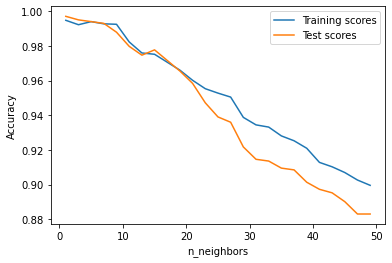

In [9]:
training_scores = []
test_scores = []

neighbors = range(1, 50, 2)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="Training scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [10]:
knn = KNeighborsClassifier()

n_range = range(1, 25)
param_grid = dict(n_neighbors=n_range)

grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.score(X_test, y_test))

{'n_neighbors': 1}
0.9969512195121951


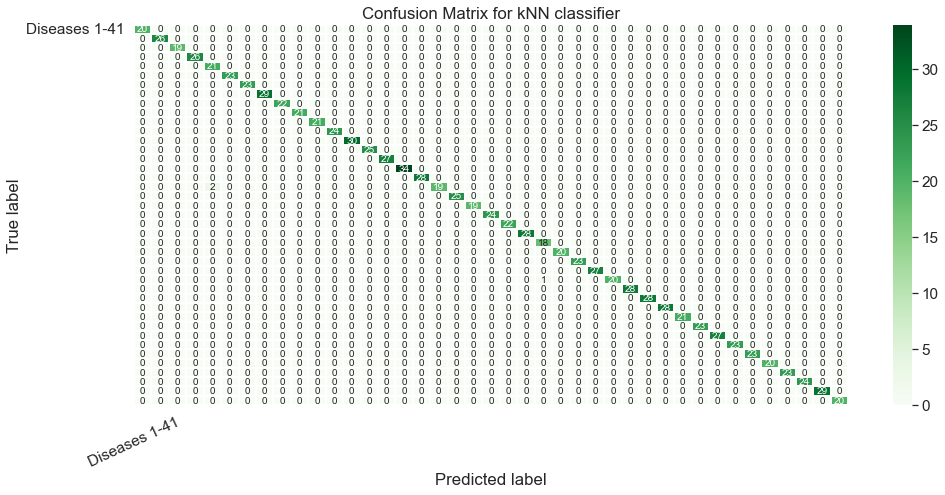

In [11]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred_test)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Diseases 1-41']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for kNN classifier')
plt.show()

# Random Forest

In [12]:
rfc=RandomForestClassifier(random_state=42, max_features=1, n_estimators= 200, max_depth=4, criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=1, n_estimators=200,
                       random_state=42)

In [13]:
performance_evaluator(rfc, X_test, y_test)

precision-----> 91.76829268292683
Accuracy-----> 91.76829268292683
F1 Score-----> 91.68836888559537
Recall-----> 91.5827407194618


(91.76829268292683, 91.76829268292683, 91.68836888559537, 91.5827407194618)

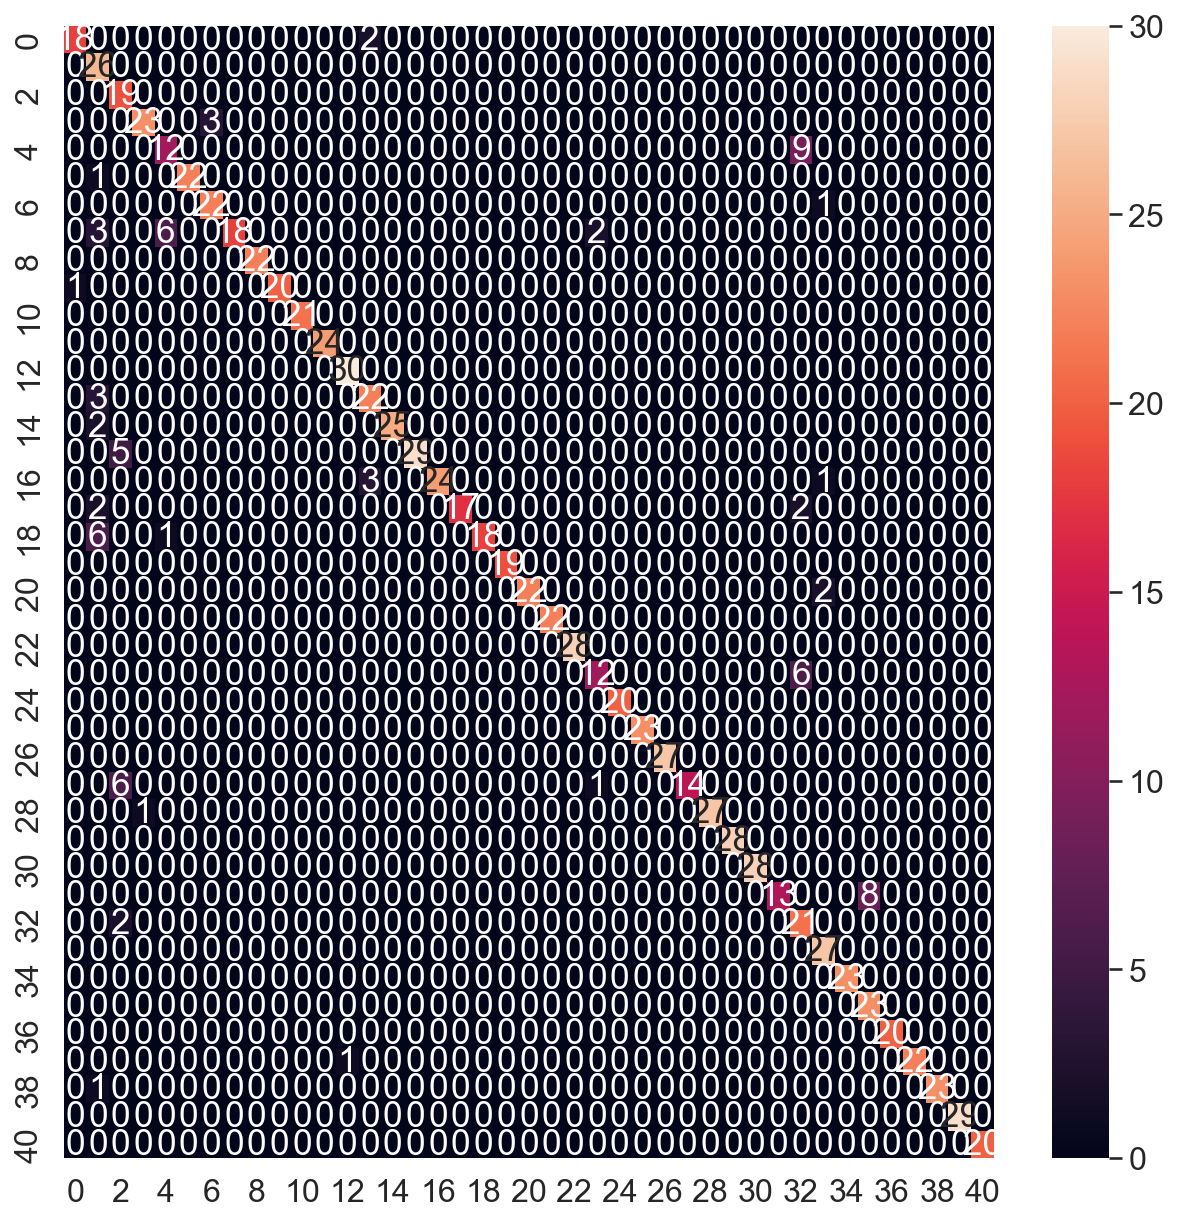

In [14]:
confusion_plot(rfc, X_test, y_test)

In [15]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, max_features=1,
                                              n_estimators=200,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [16]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [17]:
rfc_best=RandomForestClassifier(criterion= 'entropy',
 max_depth= 8,
 max_features= 'auto',
 n_estimators= 200)
rfc_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)

In [18]:
performance_evaluator(rfc_best, X_test, y_test)

precision-----> 99.1869918699187
Accuracy-----> 99.1869918699187
F1 Score-----> 99.1170978069533
Recall-----> 99.13492730986425


(99.1869918699187, 99.1869918699187, 99.1170978069533, 99.13492730986425)

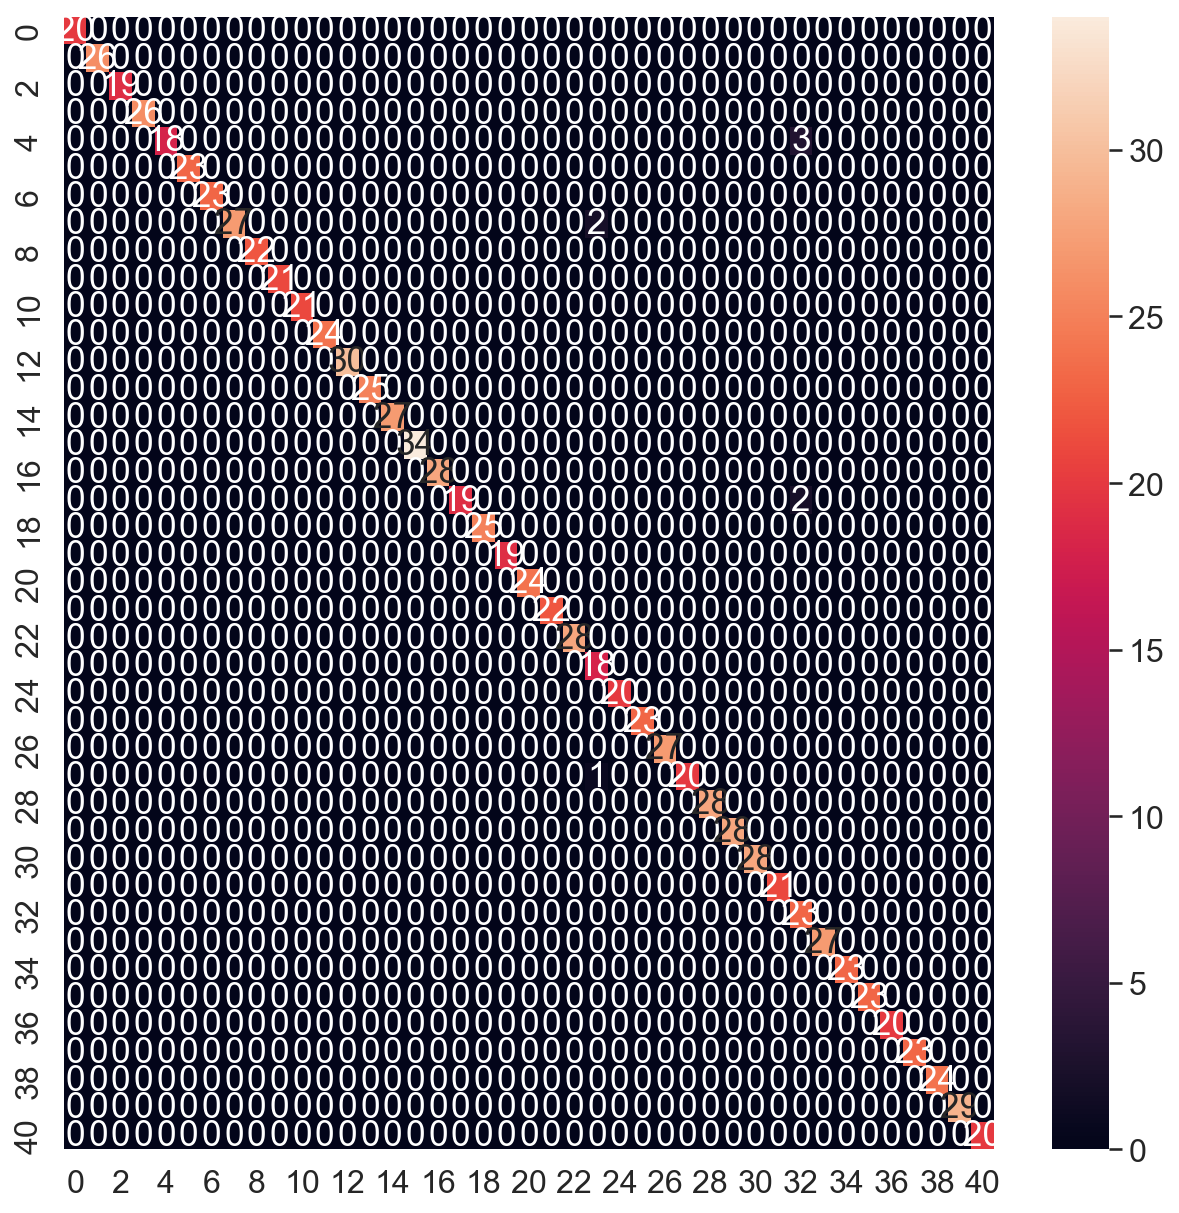

In [19]:
confusion_plot(rfc_best, X_test, y_test)

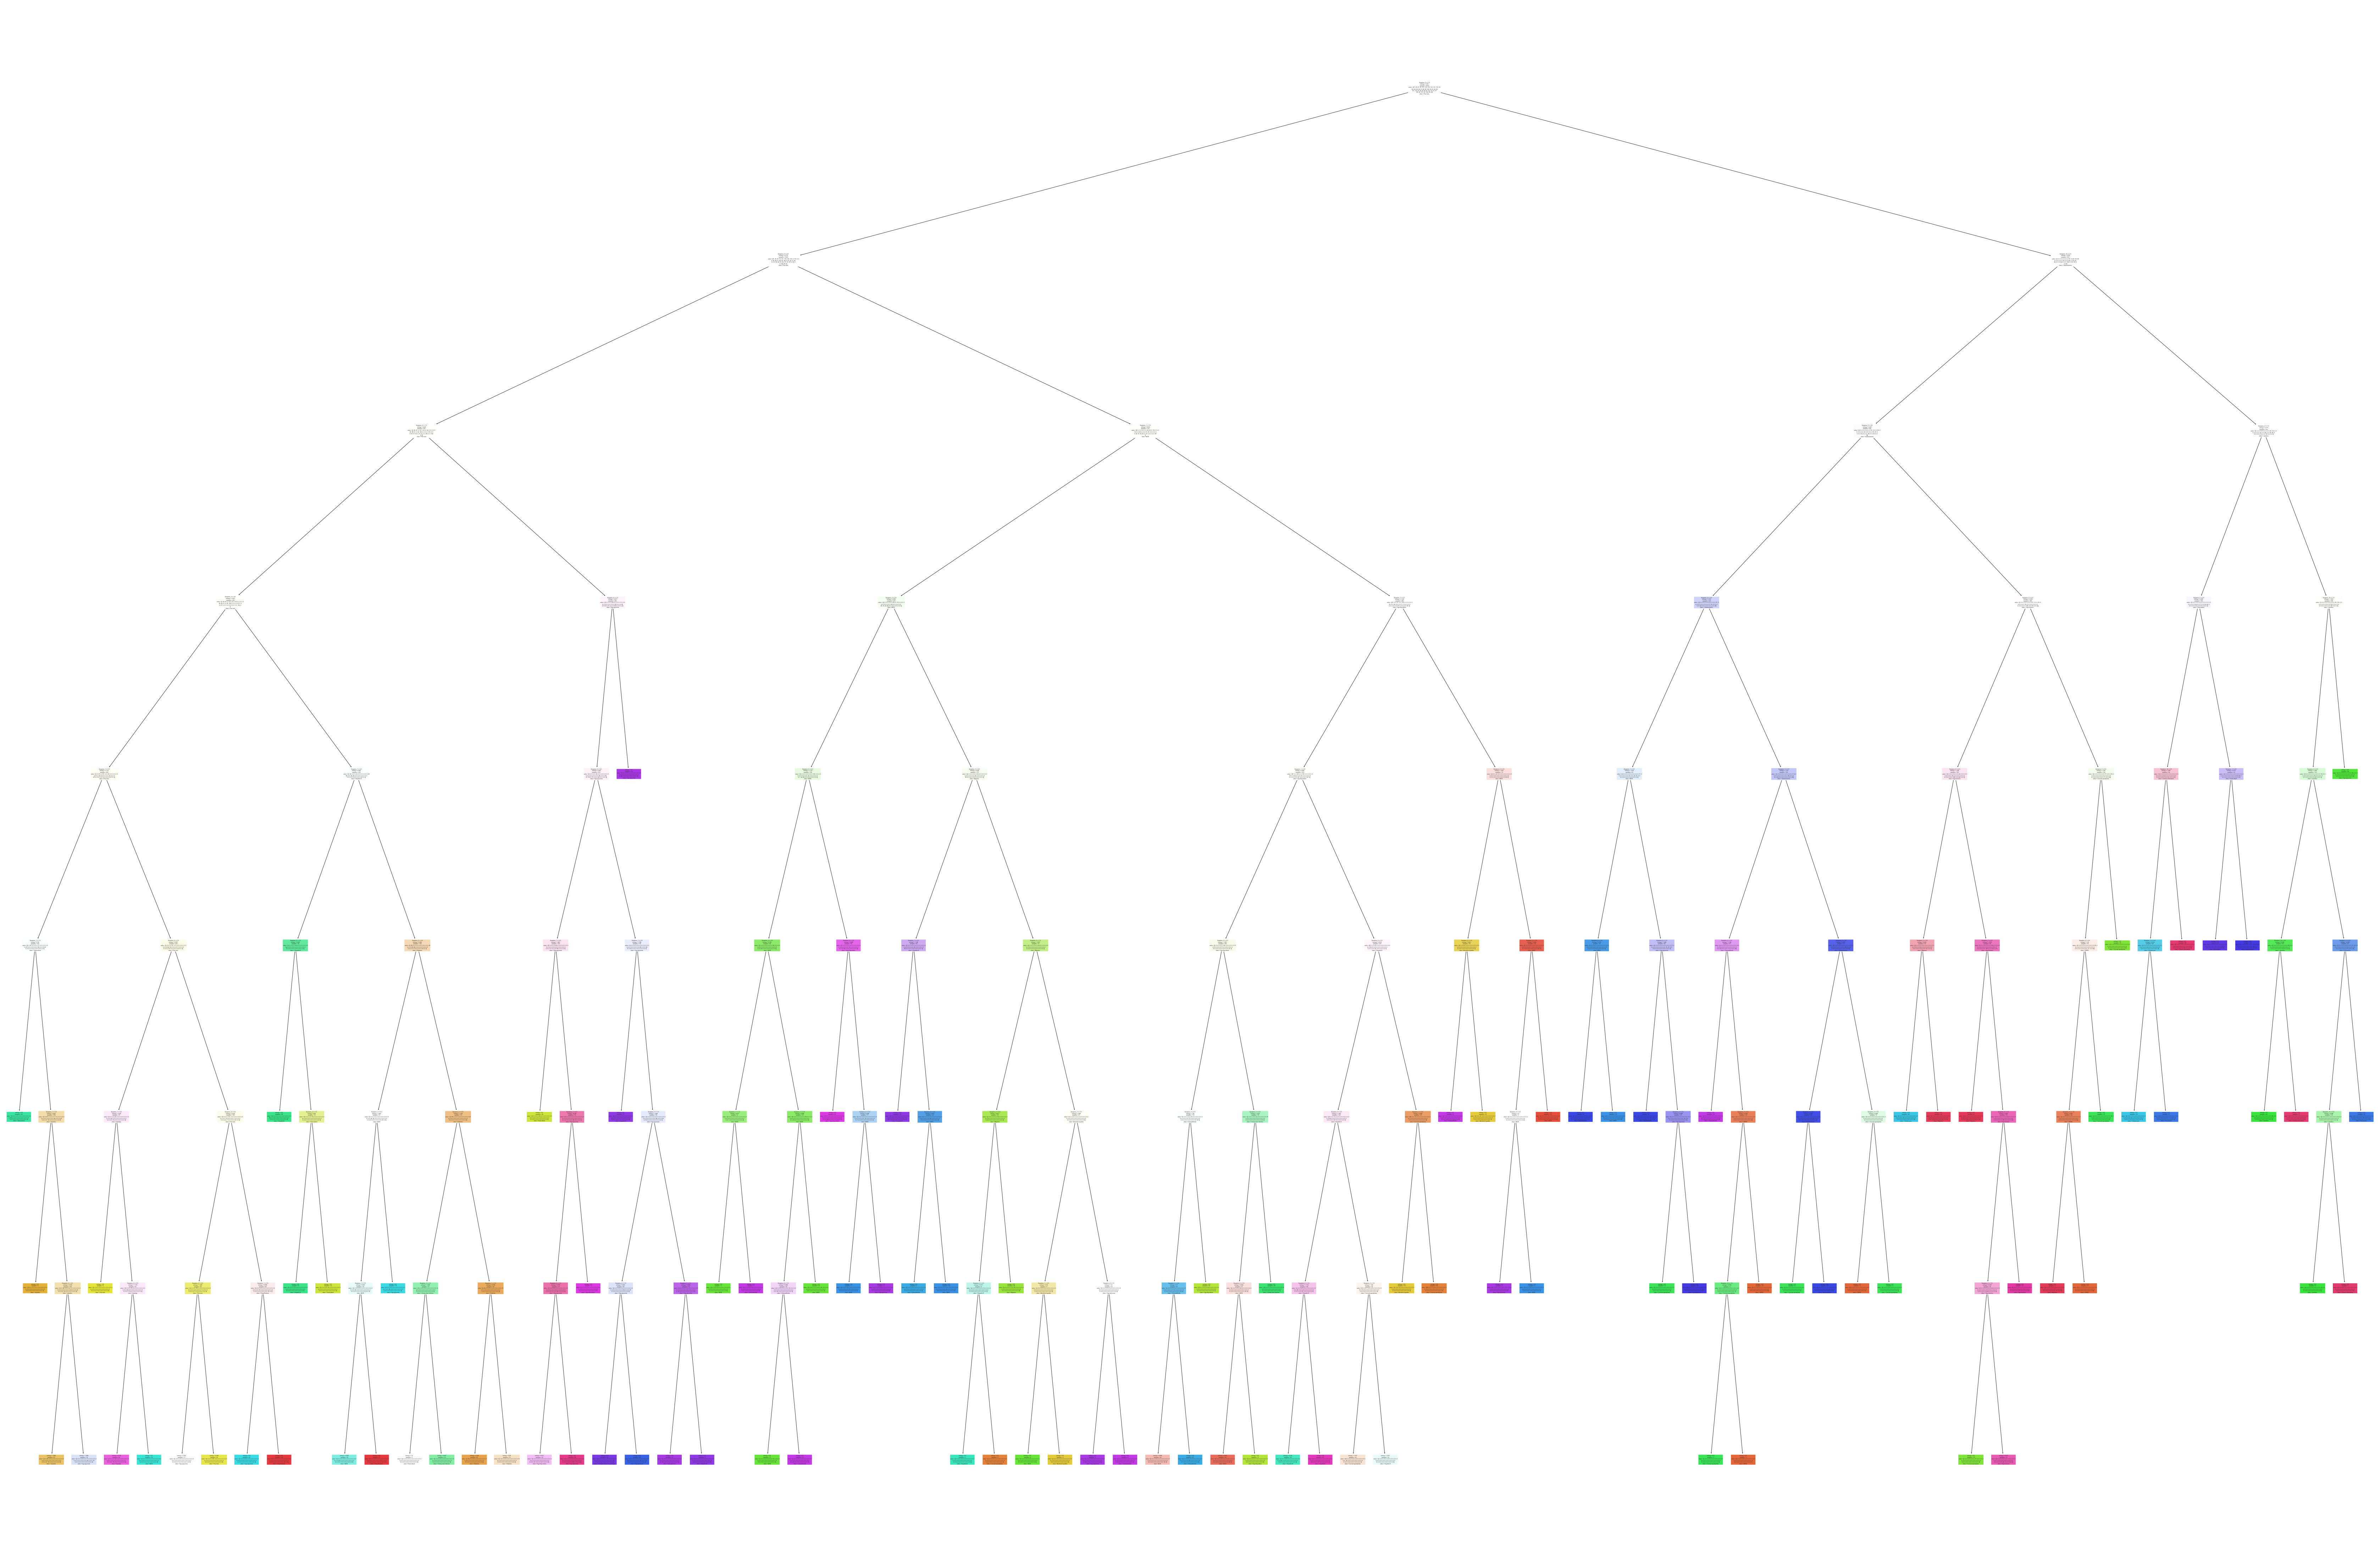

In [27]:
fig = plt.figure(figsize=(120, 80))
plot_tree(rfc_best.estimators_[0], 
          feature_names=Features,
          class_names=Classes, 
          filled=True, impurity=True, 
          rounded=True)
fig.savefig('figure_name.png')

# Feature selection

Feature: 0, Score: 0.15162
Feature: 1, Score: 0.14599
Feature: 2, Score: 0.14081
Feature: 3, Score: 0.14870
Feature: 4, Score: 0.10207
Feature: 5, Score: 0.06732
Feature: 6, Score: 0.04542
Feature: 7, Score: 0.05000
Feature: 8, Score: 0.04249
Feature: 9, Score: 0.02849
Feature: 10, Score: 0.01614
Feature: 11, Score: 0.02408
Feature: 12, Score: 0.00839
Feature: 13, Score: 0.01174
Feature: 14, Score: 0.01126
Feature: 15, Score: 0.00478
Feature: 16, Score: 0.00071


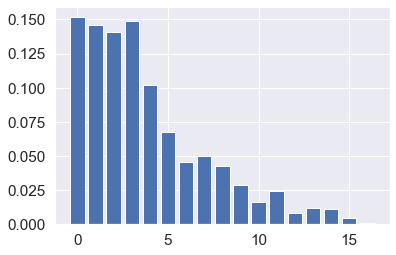

In [33]:
modelwork = RandomForestClassifier()
modelwork.fit(X,y)
importance = modelwork.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Logistic regression

In [34]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/madsbergholdtsorensen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
performance_evaluator(clf, X_test, y_test)

precision-----> 90.04065040650406
Accuracy-----> 90.04065040650406
F1 Score-----> 89.75343300764197
Recall-----> 89.85884496163182


(90.04065040650406, 90.04065040650406, 89.75343300764197, 89.85884496163182)

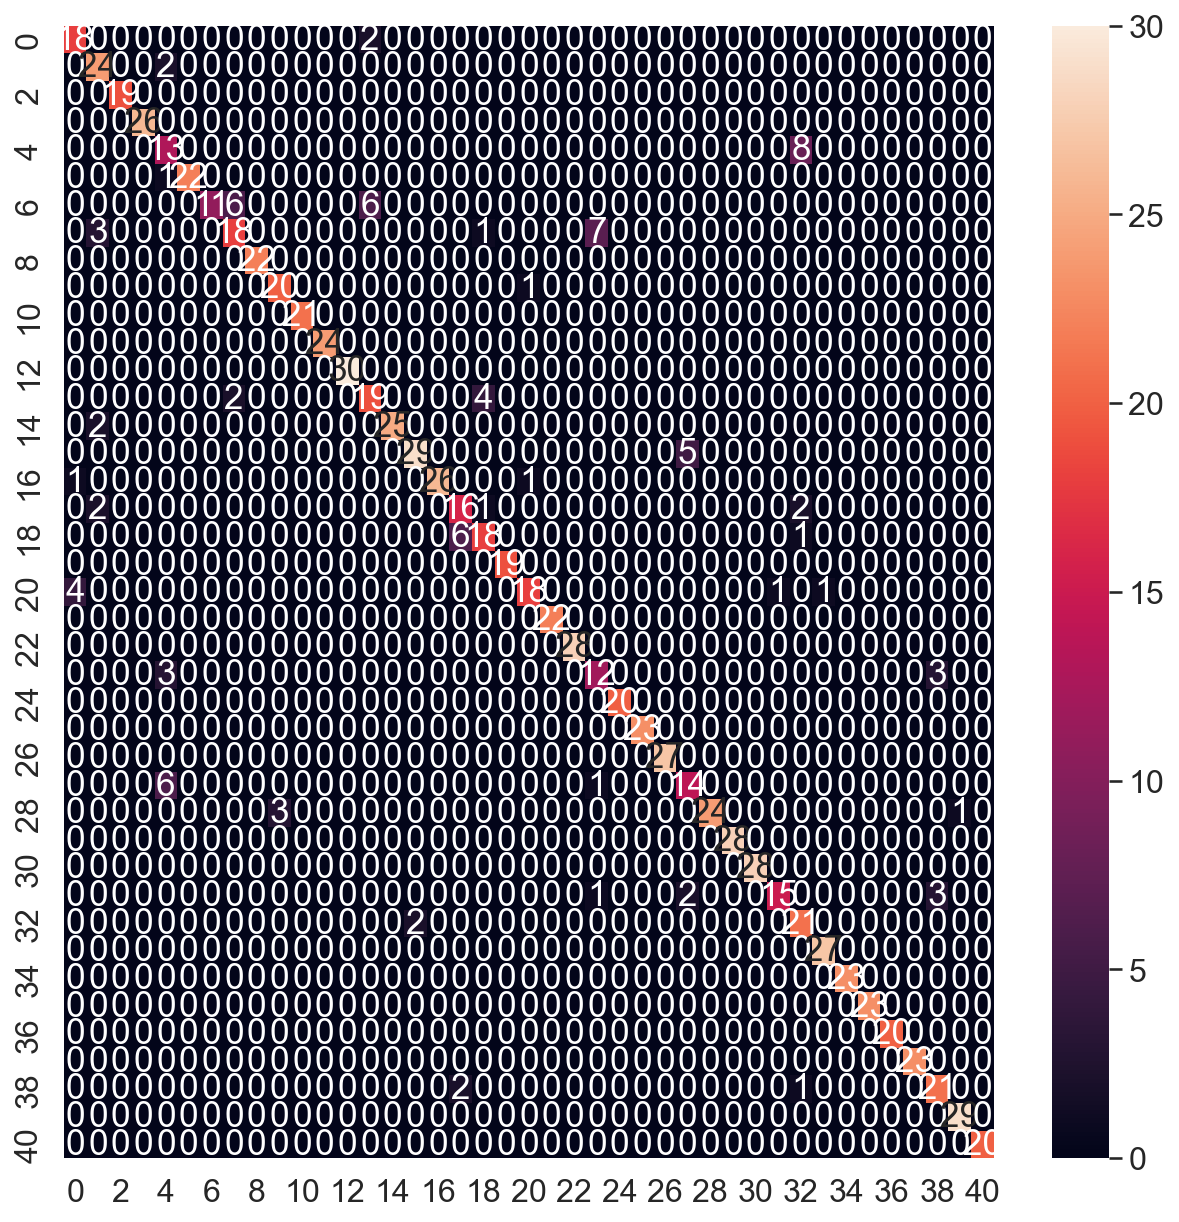

In [36]:
confusion_plot(clf, X_test, y_test)